# **Assignment 2 : Exploratory Data Analysis(EDA)**

**Name: Ankur Verma**

**Course: CAP 5768 Introduction to Data science**

**Professor: Dr. Oge Marques**

Date: Sept 29th, 2020 

Link of Assignment 2: https://colab.research.google.com/drive/1irgmoPDNrf_r8Hq0Mx907sE1RjMBuYwE?usp=sharing

In [192]:
#Importing required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
%matplotlib inline

In [193]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Part 1: Salaries**


The Python code below will load a dataset containing the salaries and demographic data of more than 1000 employees of a hypothetical company, available in the file salaries.csv, which is a simple comma-separated list of labels and values.

In [194]:
#Loading Data frame as df name
#checking on data and variables 
df = pd.read_csv('/content/drive/My Drive/salaries.csv') 
#head function will give us result of frist 5 row
df.head()

,earn,height,sex,ed,age,race
0,50000.0,74.424439,male,16,45,white
1,60000.0,65.537543,female,16,58,white
2,30000.0,63.629198,female,16,29,white
3,50000.0,63.108562,female,16,91,other
4,51000.0,63.402484,female,17,39,white


In [195]:
#tail function will show us 5 last row of dataset
df.tail()

,earn,height,sex,ed,age,race
1187,19000.0,72.165733,male,12,29,white
1188,15000.0,61.135800,female,18,82,white
1189,8000.0,63.664164,female,12,33,white
1190,60000.0,71.925836,male,12,50,white
1191,6000.0,68.368486,male,12,27,white


# 1.1 **Solution**

Earn: Yearly salary in USD

Height: person's height in inches

Sex: Person's Gender

ed: Education completed by a Person in years

Age: person's Age

Race: Person's Race(Ethinicity)

In [196]:
#shape mean how many rows and columns we have in dataset
print('Data frame of file = ',df.shape)
#count funtion means how many number of count in each variables
print(df.count())

Data frame of file =  (1192, 6)
earn      1192
height    1192
sex       1192
ed        1192
age       1192
race      1192
dtype: int64


In [197]:
#using this code we can see missing data 
df.isnull().sum()

earn      0
height    0
sex       0
ed        0
age       0
race      0
dtype: int64

In [198]:
#code for describing dataset
df.describe()

,earn,height,ed,age
count,1192.000000,1192.000000,1192.000000,1192.000000
mean,23154.773490,66.915154,13.504195,41.378356
std,19472.296925,3.853968,2.420175,15.867428
min,200.000000,57.503219,3.000000,18.000000
25%,10000.000000,64.009746,12.000000,29.000000
50%,20000.000000,66.451265,13.000000,38.000000
75%,30000.000000,69.848100,16.000000,51.000000
max,200000.000000,77.051282,18.000000,91.000000


In [199]:
 # This will give us Index, Datatype and Memory information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   earn    1192 non-null   float64
 1   height  1192 non-null   float64
 2   sex     1192 non-null   object 
 3   ed      1192 non-null   int64  
 4   age     1192 non-null   int64  
 5   race    1192 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 56.0+ KB


Summary statistics and correlations
Let's explore the dataset by plotting some graphs and displaying summary statistics.

The code below should display:

* Min, max, average, and median salary (global)
* A histogram of salaries
* A scatterplot correlating salaries and years of education
* The (Pearson) correlation coefficient between the two variables.


This should help us get started.

In [200]:
print ('salaries mean =',df['earn'].mean())

salaries mean = 23154.773489932886


In [201]:
print ('salaries median =',df['earn'].median())

salaries median = 20000.0


In [202]:
print ('salaries mode =',df['earn'].mode())

salaries mode = 0    15000.0
dtype: float64


Together we will get all result for salary statistics 

In [203]:
#salary statistics 
salary = np.array(df['earn'])
print("--- Salary statistics ---")
print("Minimum salary (global): ${:6.2f}".format(np.min(salary)))
print("Maximum salary (global): ${:6.2f}".format(np.max(salary)))
print("Average salary (global): ${:6.2f}".format(np.mean(salary)))
print("Median  salary (global): ${:6.2f}".format(np.median(salary)))

--- Salary statistics ---
Minimum salary (global): $200.00
Maximum salary (global): $200000.00
Average salary (global): $23154.77
Median  salary (global): $20000.00


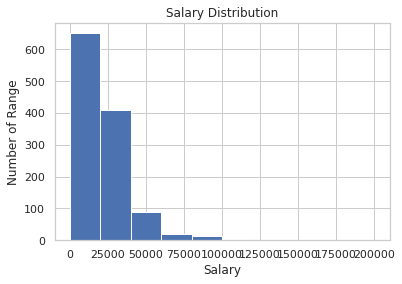

In [204]:
#plotting histogram for salary distribution 
plt.hist(salary)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Range')
plt.show()

In [205]:
years = np.array(df['ed'])

salary = np.array(df['earn'])
years

array([16, 16, 16, ..., 12, 12, 12])

A scatterplot correlating salaries and years of education.

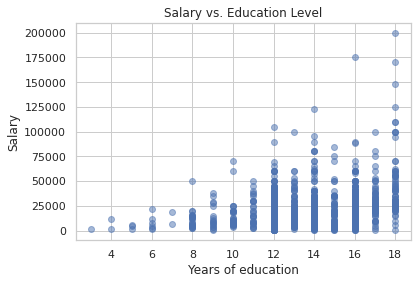

In [206]:
plt.title('Salary vs. Education Level')
plt.xlabel('Years of education')
plt.ylabel('Salary');
plt.scatter( years,salary, alpha=0.5)
plt.show()

The (Pearson) correlation coefficient between the two variables.

In [207]:
# Compute Pearson coefficient
corr, _ = pearsonr(salary,years)
print('Correlation coefficient: ',corr)

Correlation coefficient:  0.3399765246894847


The Pearson correlation coefficient (a value between -1 and 1) can be used to summarize the strength of the linear relationship between two data samples.

A simplified way to interpret the result is:

  *  A value of 0 means no correlation
  *  Values below -0.5 or above 0.5 indicates a notable (negative/positive) correlation



1.2 Your turn! (10-14 points)
Write code to:

1. Display the total headcount and the number (and %) of male and female employees. (2 pts)
2. Compute and display the min, max, average, and median salary per gender. (8 pts)
3. (OPTIONAL) Plot meaningful graphs that could provide insight into the gender inequality (if any is present) associated with the salaries in the company. (<= 4 bonus points)

In [208]:
#checking on dataset
df

,earn,height,sex,ed,age,race
0,50000.0,74.424439,male,16,45,white
1,60000.0,65.537543,female,16,58,white
2,30000.0,63.629198,female,16,29,white
3,50000.0,63.108562,female,16,91,other
4,51000.0,63.402484,female,17,39,white
...,...,...,...,...,...,...
1187,19000.0,72.165733,male,12,29,white
1188,15000.0,61.135800,female,18,82,white
1189,8000.0,63.664164,female,12,33,white
1190,60000.0,71.925836,male,12,50,white


# 1.2 **Solution**

**1. Display the total headcount and the number (and %) of male and female employees.** 


In [209]:
import numpy as np
female = (df['sex'] == 'female')
male = (df['sex']=='male')
print('Out of  1192 employees')
print ('total count of female : ',sum(female))
print ('total count of male : ',sum(male))


Out of  1192 employees
total count of female :  687
total count of male :  505


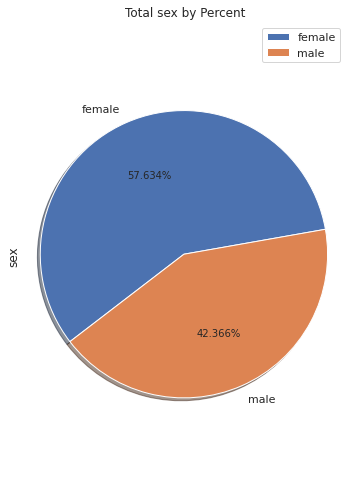

In [210]:
a = pd.DataFrame(df['sex'].value_counts()) 
#a.columns=['sex']
plt.rcParams['figure.figsize'] = [5,7]
a.plot(kind='pie', y='sex',autopct='%1.3f%%',startangle=10, shadow = True) 
plt.title('Total sex by Percent')
plt.style.use('ggplot')
plt.axis('equal') 
plt.tight_layout() 
plt.show()

After computing above operation we can see in result the number of headcount or percentage of female is more than number of males. 

**2. Computer and display the min, max, average, and median salary per gender.**

In [211]:
def salary_statstics(gendre_name, gendre_filter):
    print('\nSalary stats for {} employees'.format(gendre_name))

    s = df[gendre_filter]['earn']
    print('Minimum salary: {:6,.0f}'.format(s.min()))
    print('Maximum salary: {:7,.0f}'.format(s.max()))
    print('Average salary: {:6,.0f}'.format(s.mean()))
    print('Median  salary: {:7,.0f}'.format(s.median()))

salary_statstics('female', female)
salary_statstics('male', male)


Salary stats for female employees
Minimum salary:    200
Maximum salary: 123,000
Average salary: 18,280
Median  salary:  15,000

Salary stats for male employees
Minimum salary:  1,000
Maximum salary: 200,000
Average salary: 29,786
Median  salary:  25,000


**3. Plot meaningful graphs that could provide insight into the gender inequality (if any is present) associated with the salaries in the company.**

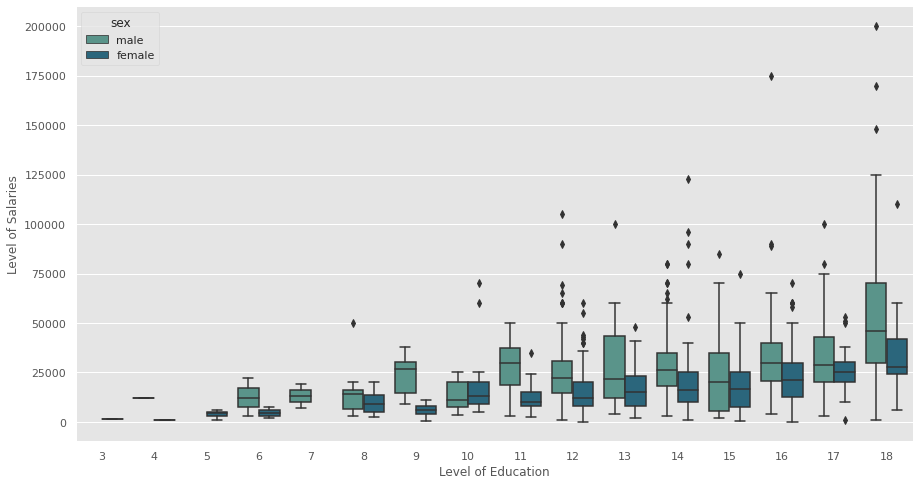

In [212]:
g = sns.boxplot(data=df,x='ed', y='earn', hue='sex',palette="crest") 
g.figure.set_size_inches(15,8) 
plt.xlabel('Level of Education')
plt.ylabel('Level of Salaries')
plt.show()

The average salary for female is lower than males average salaries, with level of education males are getting higher than females. 
* By analyzing together male and female there is sign of gender discrimination in salaries. However there is missing other most important variables like years of experience. This plot is starting point for data collection.

Since we do not have enough data in dataset, this will use age as a proxy for now.

For that matter, first we will group into ten years each.

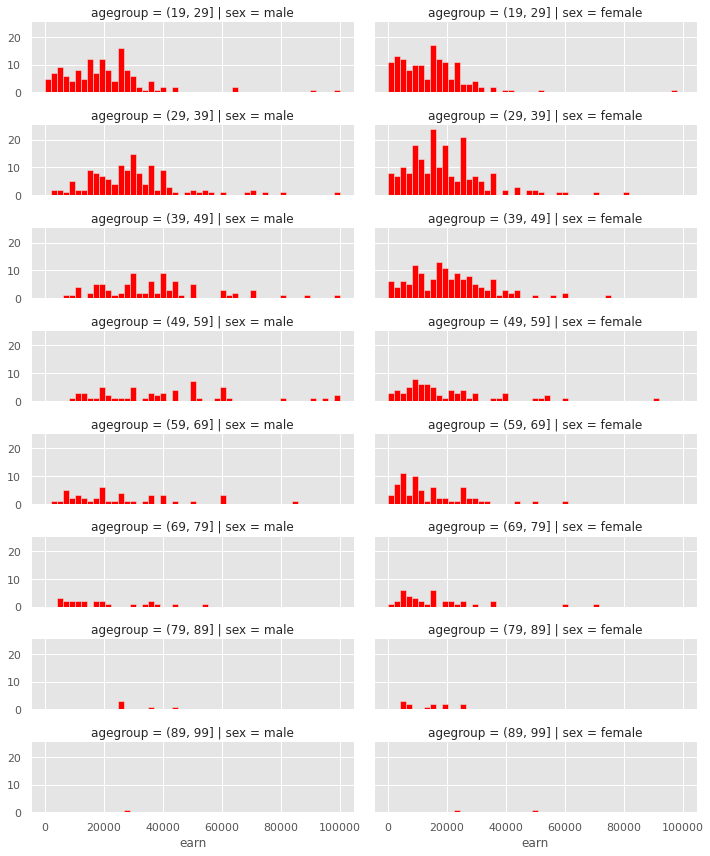

In [213]:
df['agegroup'] = pd.cut(x=df['age'], bins=[19, 29, 39, 49, 59, 69, 79, 89, 99])
bins = np.linspace(np.min(df['earn']), 100000, 50)
g = sns.FacetGrid(df, col='sex', row='agegroup')
g.fig.set_figheight(12)
g.fig.set_figwidth(10)
g.map(plt.hist, 'earn', bins=bins, color='red')

In [214]:
#Using Plotly express library 
import plotly.express as px
import plotly.graph_objects as go # or plotly.express as px
fig = px.bar(df, x="age", y="earn", color="sex", barmode="group")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()
fig = go.Figure()

The plots shows us that females getting lower values salaries in each group, but the total samples in each category are less to make it conclusive. The main earning in between 22 to 58 years.

Here we have grouped the age and above graph we are keeping 3 parameter together earning, age and sex.
In second plot the skewed is right hand and clearly see that red lins as it indicates females and blue for males.

Graph starts from at age of 18 to 91. for males at age of 18 start of salary is 50K and for females just 15K.

Yet, this is not conclusive because we can not conclude results on age parameter, the remaining parameters are also important skills, field of industry etc. Not everybody has same experience at same age. But the one point is clear females are getting lower valued salary.

# **Signs of inequality**

As you can possibly tell by now, this dataset may help us test hypotheses and answer questions related to possible sources of inequality associated with the salary distribution: gender, age, race, etc..

Let's assume, for the sake of argument, that the number of years of education should correlate well with a person's salary (this is clearly a weak argument and the plot and Pearson correlation coefficient computation above suggests that this is not the case) and that other suspiciously high (positive or negative) correlations could be interpreted as a sign of inequality.


Hypotheses H1, H2, H3
At this point, we will formulate 3 different hypotheses that might suggest that the salary distribution is biased by factors such as age, gender, or race:

* H1: Older employees are paid less (i.e., ageism)
* H2: Female employees are paid less (i.e., gender bias)
* H3: Non-whites are paid less (i.e, race bias).

# **H1 Ageism: older employees are paid less**

The hypothesis is that older employees are paid less.

As here we have set a cur of 68 as we test the hypothesis "older than 60 years of age" for this exercise.

Here we are assuming 

NOTE: we are assuming years of education should be an indication of salary level.

Step 1: add a column that defines who is "old" for this analsys. This will simplify the remainder of the code.

In [215]:
df['old'] = df['age'] > 60
corr1,_ = pearsonr(df['earn'], df['old'])
print('Correlation coefficient: ', corr1)
a = df.groupby('old')
a.agg(np.mean)

Correlation coefficient:  -0.09108937257262509


,earn,height,ed,age
old,,,,
False,23909.835481,67.116196,13.685828,36.171457
True,18991.617486,65.806674,12.502732,70.087432


<string>:6: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<string>:6: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



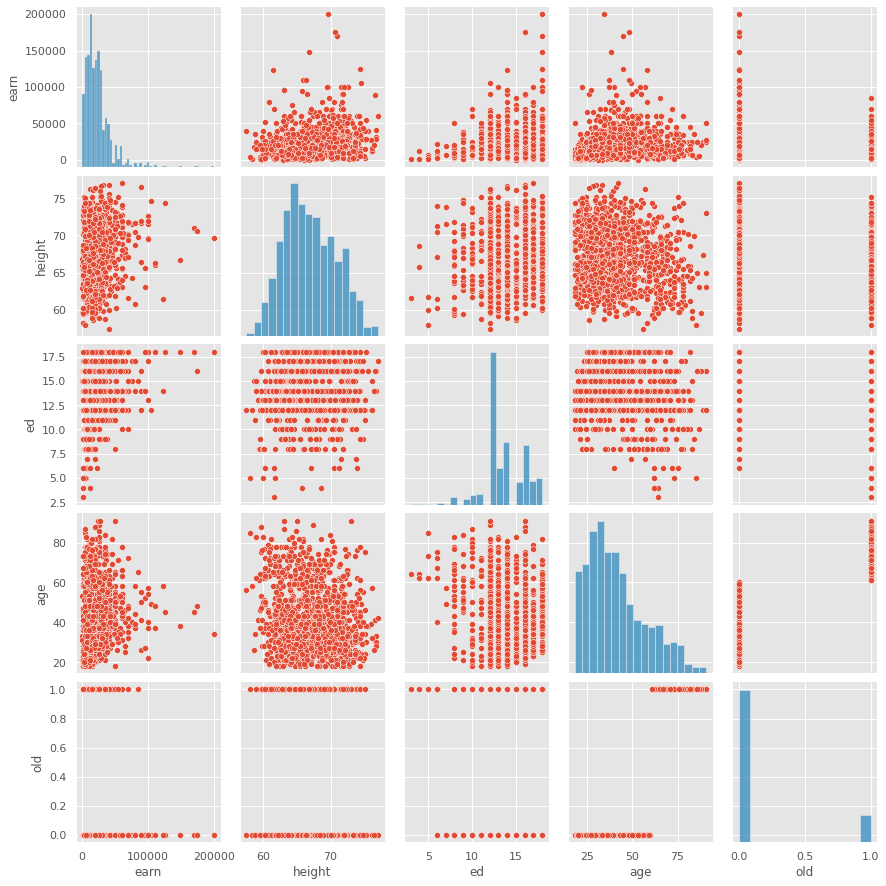

In [216]:
#creating pairplot for better understanding on correlation 
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)
plt.show()



The hypothesis is that older employees are paid less. Th result is very small negative correalation coefficient, which is almost neglible.


# **H2 Gender bias: females are paid less**

In [217]:
df['#Sex'] = (df['sex'] == 'female').astype(int)
corr, _= pearsonr(df['earn'], df['#Sex'])
print('Correlation coefficient: ', corr)
g = df.groupby('sex')
g.agg(np.mean)

Correlation coefficient:  -0.2921021854657078


,earn,height,ed,age,old,#Sex
sex,,,,,,
female,18280.195051,64.605603,13.436681,42.259098,0.161572,1.0
male,29786.130693,70.057058,13.596040,40.180198,0.142574,0.0


The table shows that different factors are inside a similar range for male and female. Given that the normal training level is basically the equivalent for the two classifications (we are assuming there is correlation between education and salary) and normal age is additionally about the equivalent, we can infer that we have signs of discrimination. 



<string>:6: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<string>:6: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



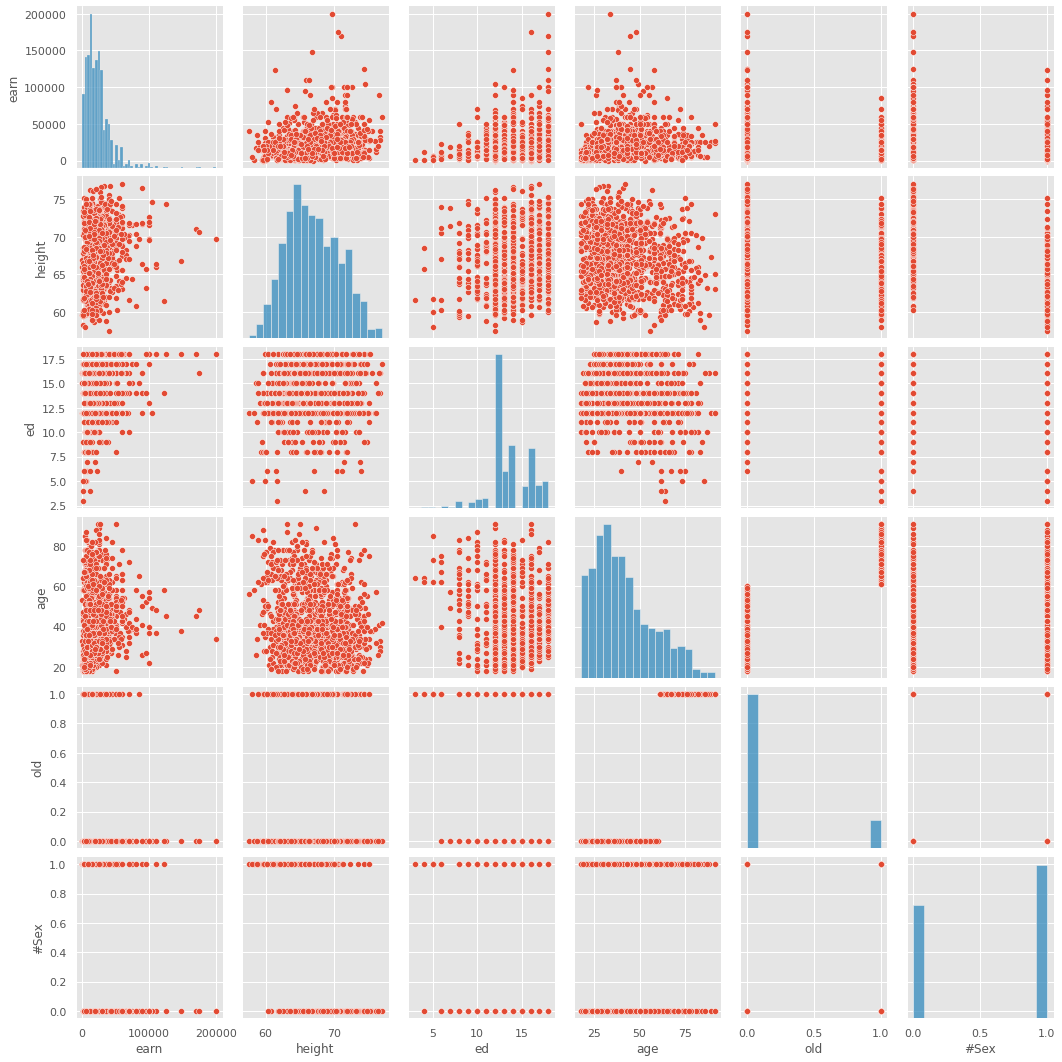

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)
plt.show()

**Conclusion:** the information we have demonstrate there might be sign of discrimination. Be that as it may, it is anything but a solid relationship. In view of this outcome, the following activity is gather and investigate other significant components (for example years of experience, hours worked per month, etc.)

# **H3 Race bias: non-whites are paid less**

In [219]:
df['non-white'] = (df['race'] != 'white').astype(int)
corr, _ = pearsonr(df['earn'], df['non-white'])
print('Correlation coefficient: ', corr)
g = df.groupby('non-white')
g.agg(np.mean)

Correlation coefficient:  -0.0825210949221862


,earn,height,ed,age,old,#Sex
non-white,,,,,,
0,23882.469161,67.055796,13.551062,41.736097,0.156724,0.574317
1,19609.497537,66.229958,13.275862,39.635468,0.137931,0.586207


The result is very negligible for race biased.

<string>:6: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<string>:6: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



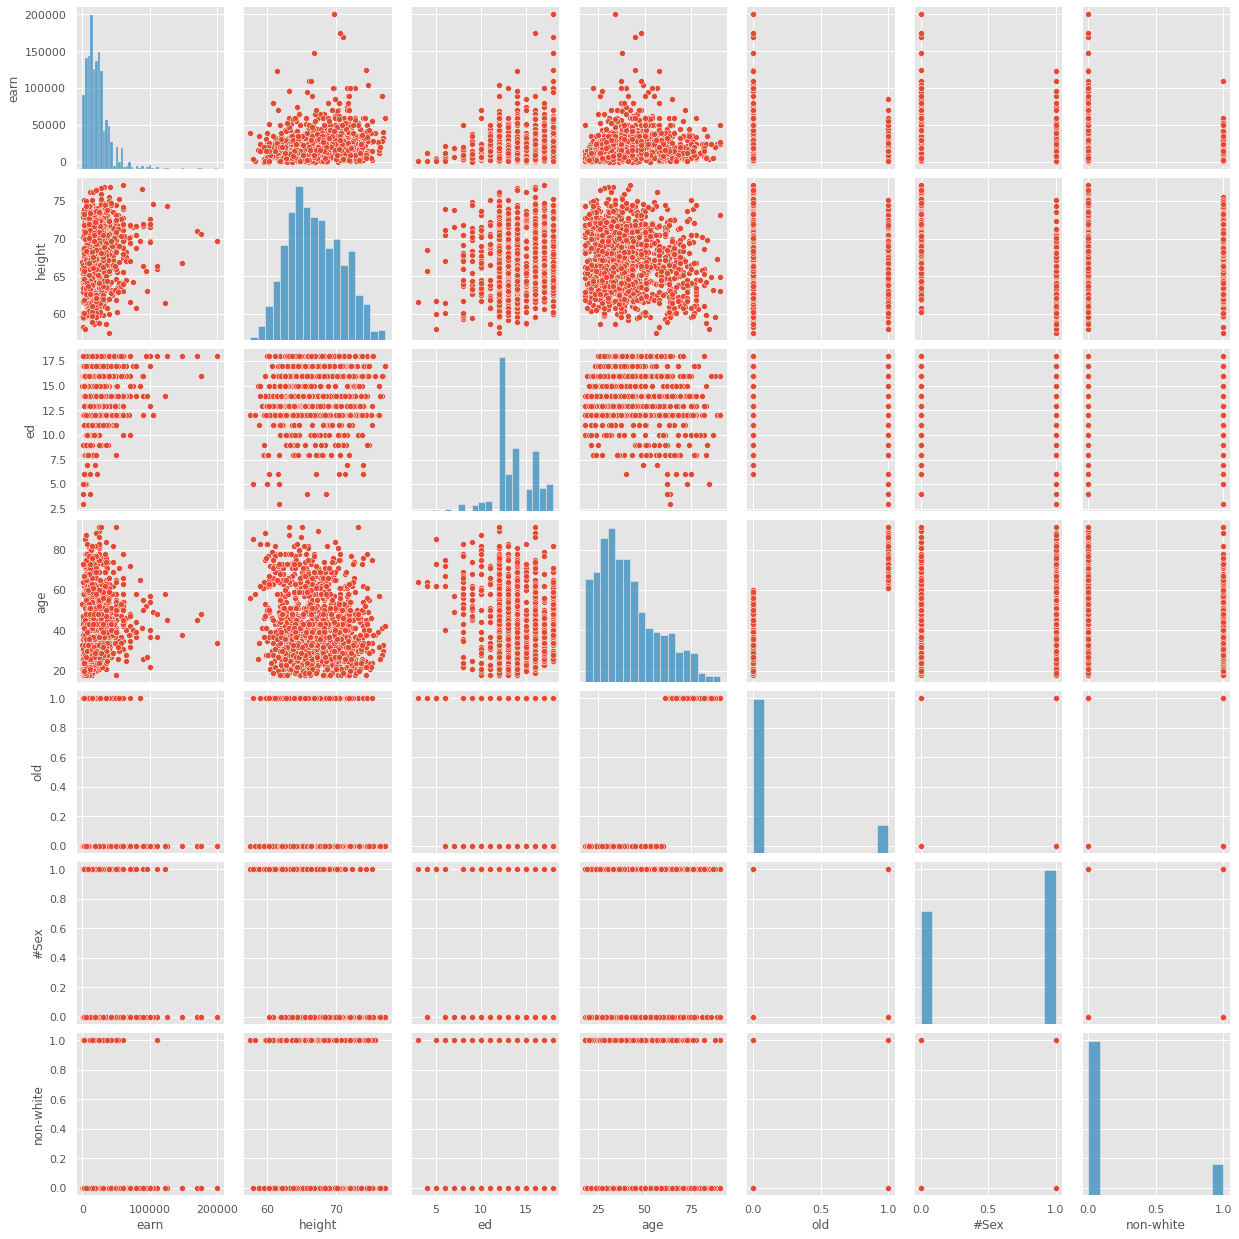

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)
plt.show()

In conclusion nothing comes highlighted that could point out discrimination.

The following tables shows us all H1,H2 and H3 hypotheses results together.

In [221]:
df.corr()

,earn,height,ed,age,old,#Sex,non-white
earn,1.000000,0.241848,0.339977,0.081003,-0.091089,-0.292102,-0.082521
height,0.241848,1.000000,0.098408,-0.136515,-0.122541,-0.699253,-0.080582
ed,0.339977,0.098408,1.000000,-0.132069,-0.176299,-0.032551,-0.042762
age,0.081003,-0.136515,-0.132069,1.000000,0.770859,0.064767,-0.049785
old,-0.091089,-0.122541,-0.176299,0.770859,1.000000,0.026041,-0.019596
#Sex,-0.292102,-0.699253,-0.032551,0.064767,0.026041,1.000000,0.009044
non-white,-0.082521,-0.080582,-0.042762,-0.049785,-0.019596,0.009044,1.000000


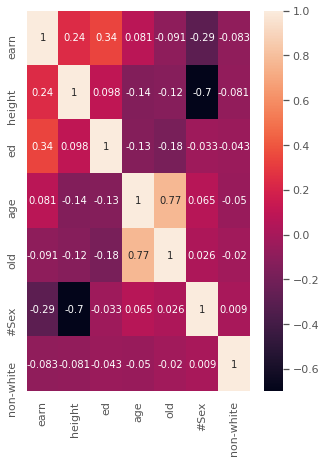

In [222]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# **Part 2: Fuel consumption**
'

The Python code below will load a dataset containing fuel consumption data for ~400 vehicles produced in the 1970s and the 1980s along with some characteristic information associated with each model.

Here, displacement refers to a vehicle's engine size and the fuel efficiency is measured in miles per gallon (mpg).

See: https://archive.ics.uci.edu/ml/datasets/Auto+MPG for additional information.

In [223]:
sns.set(style='ticks', palette='Set2')
%matplotlib inline

In [224]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                   delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name'])
print(data.shape)

(406, 9)


In [225]:
#here we have dropped missing data
data.dropna(inplace=True)
print(data.shape)

(392, 9)


In [226]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


###**2.1 Your turn! (10-12 points)**

Write code to:

* Count the number of 3- and 5-cylinder vehicles in the dataset, display the count, and discard those entries (rows). (6 pts)
* Compute and display the min, max, and average fuel consumption (in mpg) for 4-, 6-, and 8-cylinder vehicles. (4 pts)
* (OPTIONAL) Display the name of the most and least fuel efficient vehicles in the dataset (<= 2 points)

# **Solution**

**1. Three- and five-cylinder cars**
* Count the number of 3- and 5-cylinder vehicles in the dataset, display the count, and discard those entries (rows).

In [227]:
import numpy as np
cylinder_3 = (data['cylinders'] == 3)
cylinder_5 = (data['cylinders'] == 5)
print ('total count of cylinder_3 : ',sum(cylinder_3))
print ('total count of cylinder_5 : ',sum(cylinder_5))


total count of cylinder_3 :  4
total count of cylinder_5 :  3


In [228]:
df1 = data[data.cylinders != 3]
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [229]:
df2 = df1[df1.cylinders != 5]
df2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


**2. Min, max, average fuel consumption by number of cylinders**

In [230]:
cars = df2.groupby('cylinders')
cars.agg([min, max, np.mean])['mpg']

,min,max,mean
cylinders,,,
4.0,18.0,46.6,29.283920
6.0,15.0,38.0,19.973494
8.0,9.0,26.6,14.963107


**3. Most and least fuel efficient vehicles**

In [231]:
def car_names(cn):
  cn.join(str(i) for i in cn['car_name'])
  return

cn = df2
cn[cn['mpg']== cn['mpg'].max()]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
329,46.6,4.0,86.0,65.0,2110.0,17.9,80.0,3.0,mazda glc


Mazada glc is most efficient fuel car

In [232]:
cn[cn['mpg']== cn['mpg'].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
34,9.0,8.0,304.0,193.0,4732.0,18.5,70.0,1.0,hi 1200d


hi 1200d is least efficient fuel car

# **Hypotheses and questions**
This dataset may help us test hypotheses and answer questions related to fuel consumption.

To get started: Which features of a vehicle correlate best with its mpg -- displacement, weight, or horsepower?

  2.2. Your turn! (24 points)

Write Python code to plot the relationship between (8 pts each):

1. Fuel consumption and displacement (engine size)
2. Fuel consumption and weight
3. Fuel consumption and horsepower (HP)

# **Solution**

1. **Fuel consumption and displacement (engine size)**

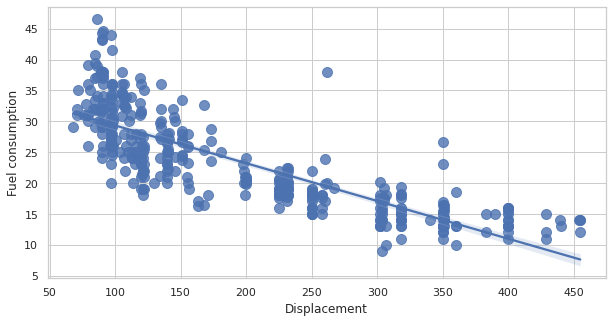

In [233]:
#importing library and seting theme for color
import seaborn as sns; sns.set_theme(color_codes=True)
#style
sns.set_style('whitegrid') 
#size of plot
plt.figure(figsize=(10,5))
#Regression plot x,y, dataset name, x_jitter to clear noise in data
sns.regplot(x='displacement', y='mpg', data = df2,scatter_kws ={'s':100},x_jitter=.1) 
#labels
plt.xlabel('Displacement')
plt.ylabel('Fuel consumption')
plt.show()

In the result there is negative correlation between fuel consumption and displacement.

**2. Fuel consumption and weight**

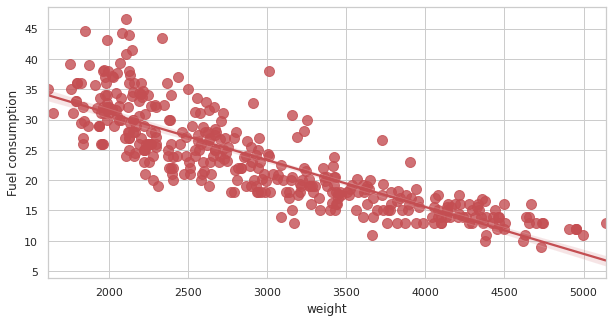

In [234]:
#importing library and seting theme for color
import seaborn as sns; sns.set_theme(color_codes=True)
#style
sns.set_style('whitegrid') 
#size of plot
plt.figure(figsize=(10,5))
#Regression plot x,y, dataset name, x_jitter to clear noise in data
sns.regplot(x='weight', y='mpg', data = df2,scatter_kws ={'s':100},x_jitter=.1,color = 'r') 
#labels
plt.xlabel('weight')
plt.ylabel('Fuel consumption')
plt.show()

In the above result there is negative correlation between fuel consumption and weight. The graph is linear

**3. Fuel consumption and horsepower (HP)** 

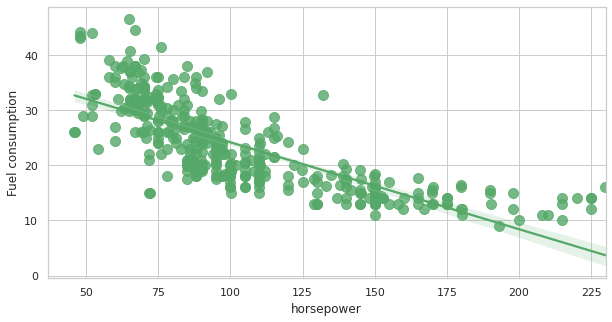

In [235]:
sns.set_style('whitegrid') 
plt.figure(figsize=(10,5))
sns.regplot(x='horsepower', y='mpg', data = df2,scatter_kws ={'s':100},x_jitter=.1, color = 'g') 
plt.xlabel('horsepower')
plt.ylabel('Fuel consumption')
plt.show()

There is correlation between horsepower and fuel consumption but line is linear and it shows negative correlation.

In conclusion of the relationship between horsepower and fuel consumption that may not be liner in all ranges because at the right side of sample points are far from line. It is appear in above graph,and the cluster of samples more tend below the linear regression line. In this case we need more data for accurate results. With haveing this result most of part the relationship is linear.

## **Hypotheses H4 and H5**

At this point, we will formulate two hypotheses that should be confirmed or refuted based on the data:

* H4: fuel efficiency improved over the years represented in this dataset (i.e., 1970 through 1982).
* H5: Japanese cars (within the same time frame) are more fuel efficient than American or European ones.

### 2.3 Your turn! (20-26 points)

Write Python code to produce (box)plots that should provide good answers to the hypotheses H4 and H5 above (and some text to explain whether they were confirmed or not).

Weight: 20 pts, i.e., 10 pts per hypothesis. Up to 6 bonus points for insightful additional hypotheses, code, and/or comments.

Hint:

data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])

# **Solution**

## **H4: fuel efficiency improved over the years represented in this dataset (i.e., 1970 through 1982).**

<Figure size 576x360 with 0 Axes>

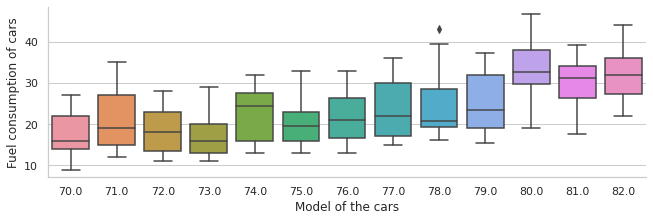

In [236]:
sns.set_style('whitegrid') 
plt.figure(figsize=(8,5))
sns.catplot(data=df2,x='model',y='mpg',kind='box',height=3, aspect=3)
plt.xlabel('Model of the cars')
plt.ylabel('Fuel consumption of cars')
plt.show()

The above graphs shows us that the car got more efficient by the time pass over years.The last quarter of models goes up as well.

The recent years cars are more efficient than the last few years of cars. 

## **H5: Japanese cars (within the same time frame) are more fuel efficient than American or European ones.**


In [237]:
car1= data.copy()
car1['Country_code'] = df2.origin.replace([1,2,3],['USA','Europe','Japan'])
car1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,Country_code
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,USA
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,USA
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,USA
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,USA
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,USA
...,...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl,USA
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup,Europe
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage,USA
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger,USA


<Figure size 576x360 with 0 Axes>

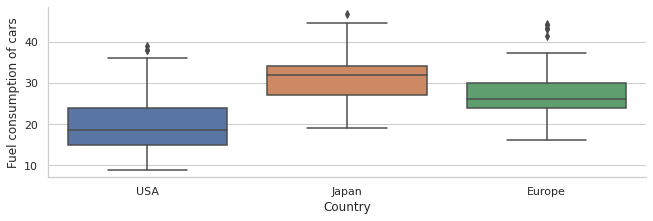

In [238]:
sns.set_style('whitegrid') 
plt.figure(figsize=(8,5))
sns.catplot(data=car1,x='Country_code',y='mpg',kind='box',height=3, aspect=3)
plt.xlabel('Country')
plt.ylabel('Fuel consumption of cars')
plt.show()

The above graphs shows us that in Japanese cars are most efficient fuel consumption than USA and Europe.
In boxplot it also shows in general most efficient as shown in the quartiles. 

##**Conclusions (16 points)**
**Write your conclusions and make sure to address the issues below:**

* What have you learned from this assignment?
* Which parts were the most fun, time-consuming, enlightening, tedious?
* What would you do if you had an additional week to work on this?

# **Solution**

### **What have you learned from this assignment?**

* I have learned about google colab funtion, specifically to mount drive to google colab.
* Loading dataset, cleaning of data, hypothesis testing, ploting different plots with using most of inner funtion,creating define funtion and class.
* learned about pandas, numpy, seaborne, matplotlib libraries and lost of operations to create meaning graphs and efficient results.
* Learned heatmaps and pairplot is easy way to get correlation with using function corr() 
* how to drop specific row with small line of code
* conceptual I have learned that how to create simple linear regression plot to test hypothesis in simple way.

### **Which parts were the most fun, time-consuming, enlightening, tedious?**

 **Fun part** : 
1. playing with multiple format of plots
2. changing their funtions and colors
3. learning how to make regression plot in seaborn
4. learning how to clean data and aggregate data

**time-consuming** :
* To plot readble format graphs with multiple categories 

**enlightening**
* The power of plotting tools libraries and drroping specific data in one line code

**tedious**
* Nothing 



### **What would you do if you had an additional week to work on this?**

* In addtional I will make more better graphs with color coding and size of the graph
* Try to get more insight from car and salary data such as education and age variable comparion with sex Group and try more different ways .
* Mostly I will focus on to create efficient Defined functions and different methods to get results with simple line of codes.